# Model Evaluation

## Topics Include:
1. Dummy Classifier
2. Accuracy 
3. Sensitivity/Recall
4. Precision
5. Confusion Matrix
6. Decision_function
7. ROC curve 
8. Precision recall curve
9. Grid search


## Goal

To train several models and evaluate how effectively they predict instances of fraud data.

### Data Set
Fraud data from [Kaggle Fraud Data Set](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

Each row in `fraud_data.csv` corresponds to a credit card transaction.<br> 
Features include confidential variables `V1` through `V28` as well as `Amount` <br>
which is the amount of the transaction. 
 
The target is stored in the `class` column: 
1. a value of `1` corresponds to an instance of `fraud` 
2. a value of `0` corresponds to an instance of `not fraud`


In [1]:
import numpy as np
import pandas as pd

## 1. Percentage of Fraud Instances

*This function will return a float between 0 and 1.* 

In [2]:
def per_fraud():
    
    data = pd.read_csv('fraud_data.csv')
    noFraud, fraud =  data['Class'].value_counts()
    result = fraud / (noFraud + fraud)
    
    return result

per_fraud()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following tasks
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 2. Dummy Classifier 

### Goal

1. Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above) to train a
<br>dummy classifier that classifies everything as the majority class of the training data.
2. Understand the accuracy and recall of this classifier. 

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def dummyClassifier():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    majority_class = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    majority_class_pred = majority_class.predict(X_test)
    
    accuracyScore = majority_class.score(X_test, y_test)
    recallScore = recall_score(y_test, majority_class_pred)
    
    return (accuracyScore, recallScore)

dummyClassifier()

(0.9852507374631269, 0.0)

## 3. SVC Classifier, Accuracy, Recall, Precision

### Goal

1. Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above) to train a<br>
SVC classifier using the default parameters.
2. Understand the accuracy, recall, and precision of this classifier. 

*This function should a return a tuple with three floats, <br>
i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def svcClassifier1():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    
    accuracyScore = svm.score(X_test, y_test)
    recallScore = recall_score(y_test, svm_pred)
    precisionScore = precision_score(y_test, svm_pred)
    
    return (accuracyScore, recallScore, precisionScore)

svcClassifier1()

(0.9907817109144543, 0.375, 1.0)

## 4. SVC Classifier, Confusion Matrix

### Goal

1. Train a SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`
2. Genreate a confusion matrix using a threshold of -220 on the decision function.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def conf_matrix():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    dec_fun = svm.decision_function(X_test) > -220
    
    conf_matrix = confusion_matrix(y_test, dec_fun)
    
    return conf_matrix

conf_matrix()

array([[5320,   24],
       [  14,   66]])

## 5. Logistic Regression, Precision-Recall Curve, ROC Curve

### Goal

1. Train a logisitic regression classifier with default parameters using `X_train and y_train`.
2. Create a `precision-recall curve` and a `ROC curve` using y_test and <br> the probability estimates for X_test (probability it is fraud).
3. Find the `recall` when the `precision` is **`0.75`** in the precision-recall curve
4. Find the `true positive rate` when the `false positive rate` is **`0.16`** in the ROC curve

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


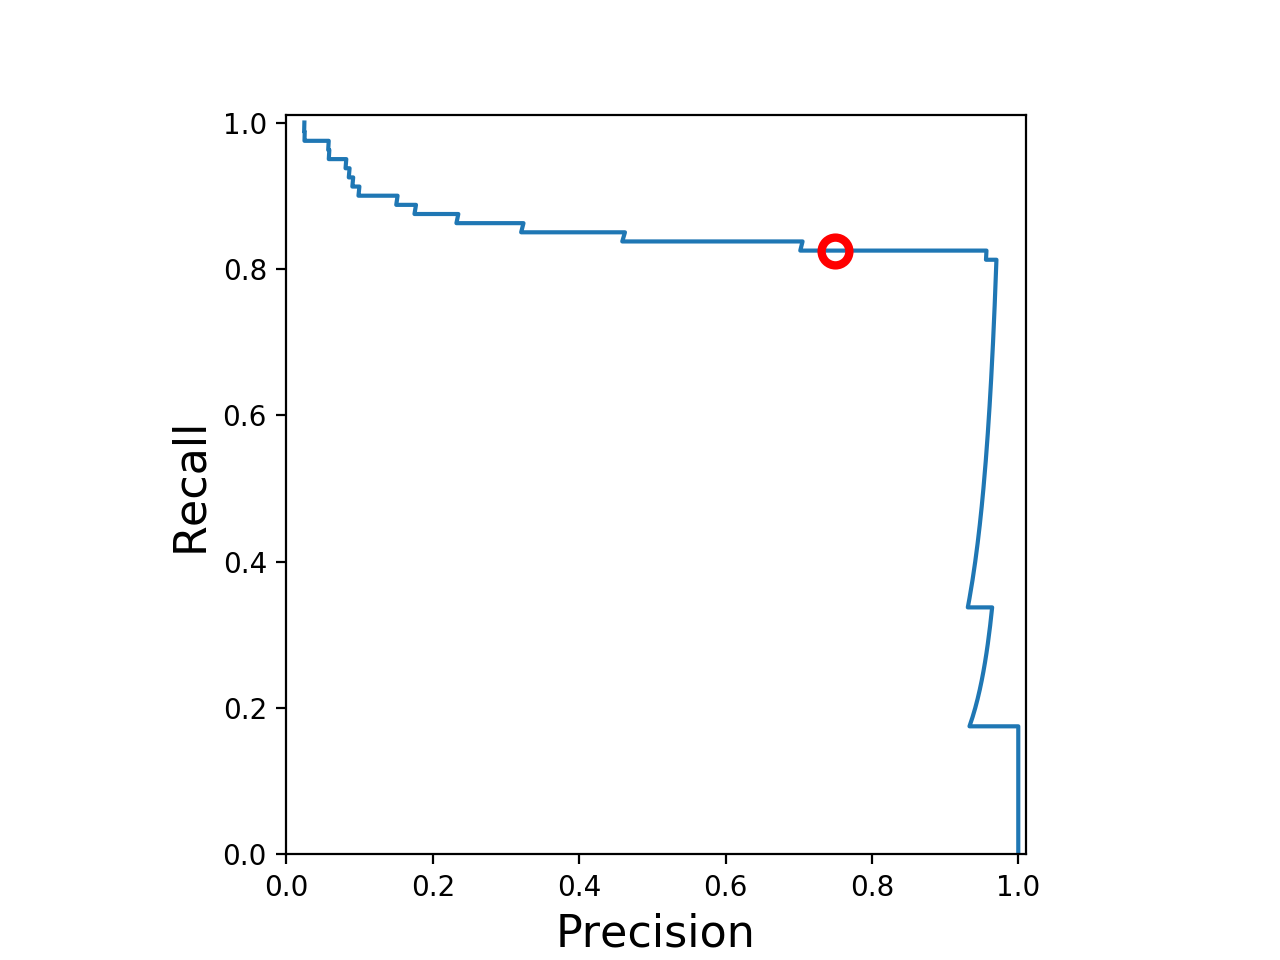

/Users/mumudreamer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


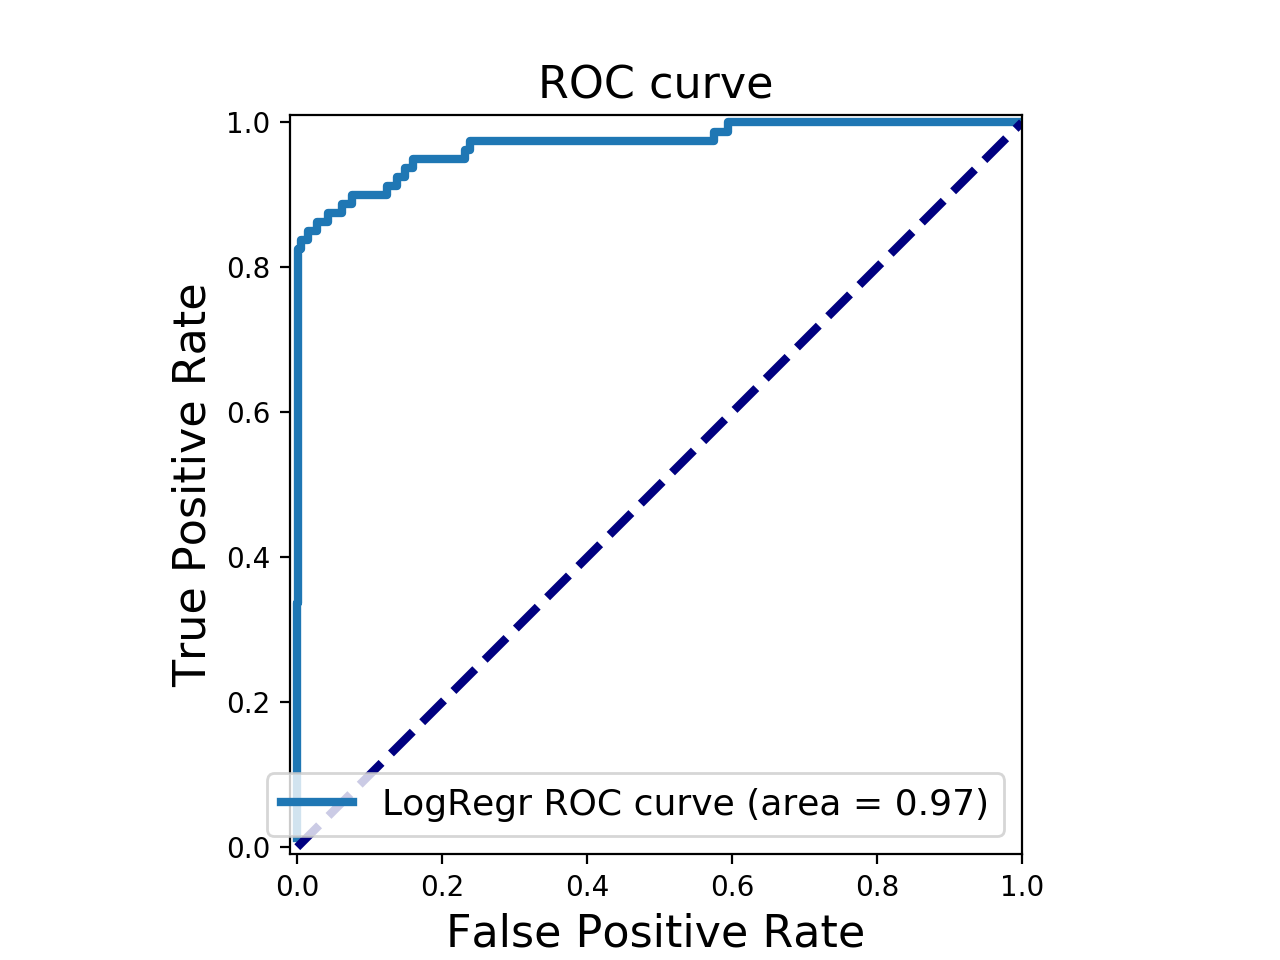

(0.825, 0.9375)

In [10]:
def answer_five():  
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    lr = LogisticRegression().fit(X_train, y_train)
    y_score = lr.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    recall_required = recall[np.argmin(abs(precision - 0.75))]
    tpr_required = tpr_lr[np.argmin(abs(fpr_lr - 0.16))]
    
    # Precision-Recall Curve
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(0.75, recall_required, 'o', markersize = 10, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

    # ROC curve
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
    return (recall_required, tpr_required)

answer_five()

## 6. Grid Search, Logistic Regression

Perform a grid search over the parameters listed below for a Logistic Regression classifier,<br> using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

In [11]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    lr = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
    grid_lr_acc = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_lr_acc.fit(X_train, y_train)
    
    result = np.array(grid_lr_acc.cv_results_['mean_test_score'].reshape(5,2))

    return result

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

<IPython.core.display.Javascript object>


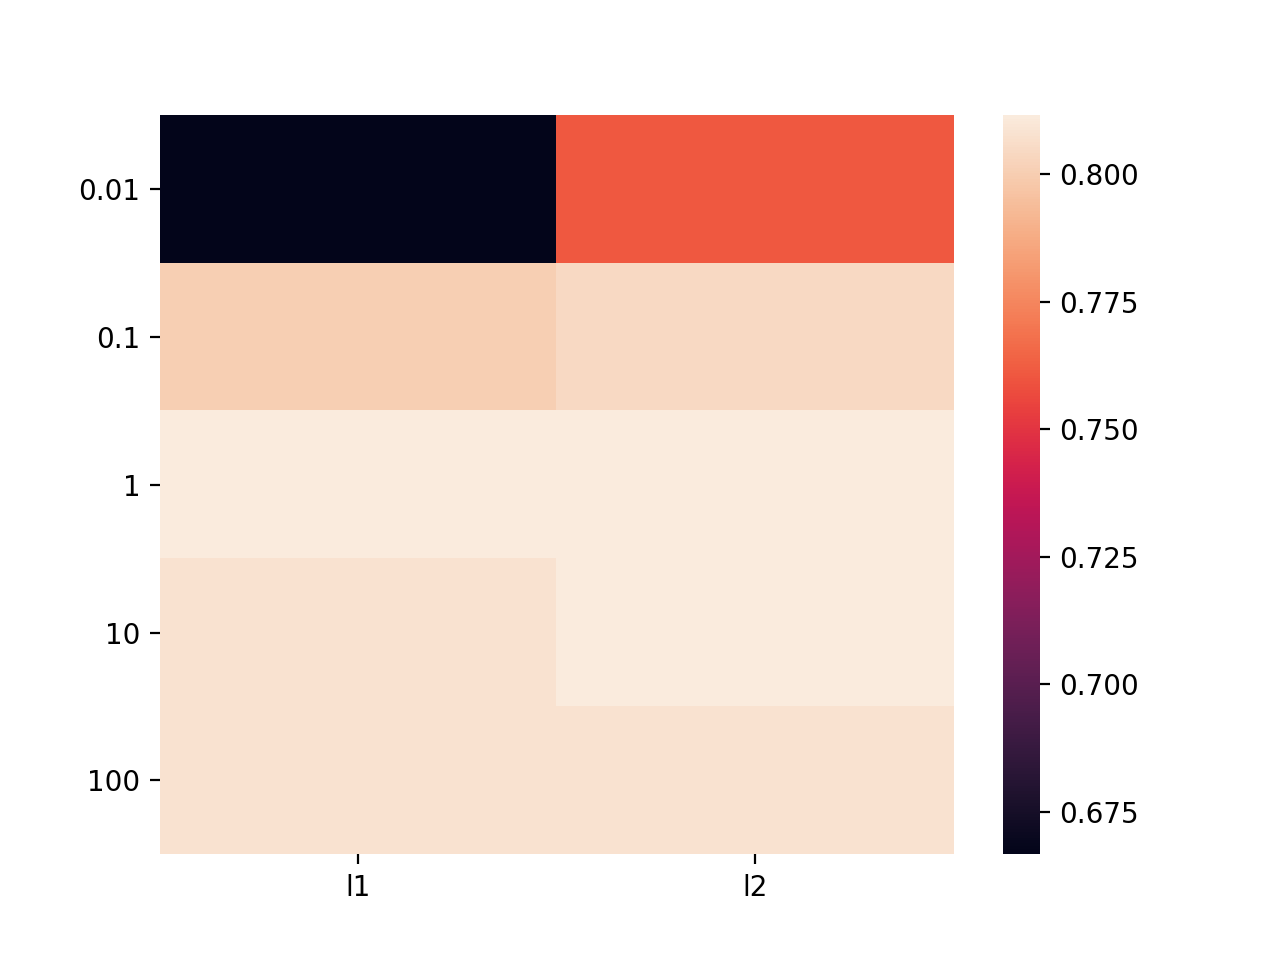

In [12]:
#  To visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())